N.B. This is a notebook I created for my talk at [Hopperx1 London 2019](https://community.anitab.org/event/hopperx1-london/) organised by fabulous people at [AnitaB.org](https://anitab.org/).

It is best viewed as an interactive HTML slide deck using [nbconvert](https://nbconvert.readthedocs.io/en/latest/install.html), as otherwise the styling of most HTML elements will be completely off!

You can visit a [slide deck](https://misaogura.github.io/flashtorch/presentations/Hopperx1London/) hosted on the presentation section on the project GitHub page.

Alternatively, you can use `nbconvert` to serve up locally. Here's how to do it.

From your terminal, run:

```
$ jupyter nbconvert presentation/hopperx1.ipynb --to slides --post serve
```

It should open up a browser automatically.

Modify the path to this notebook depending on where you're lauching it from.

<head>
    <title>Seeing is believing @ Hopperx1 London June 2019</title>
    <link rel="stylesheet" href="https://use.fontawesome.com/releases/v5.8.2/css/all.css" integrity="sha384-oS3vJWv+0UjzBfQzYUhtDYW+Pj2yciDJxpsK1OYPAYjqT085Qq/1cq5FLXAZQ7Ay" crossorigin="anonymous">
    <link rel="icon" href="hhttps://emojipedia-us.s3.dualstack.us-west-1.amazonaws.com/thumbs/240/apple/198/electric-torch_1f526.png">
<head>

<div class='title'>
    <h1 id='main-title'>Seeing is believing</h1>

    <h3 id='subtitle'>Using FlashTorch 🔦 to shine a light on what neural nets "see"</h3>
    
    <a href='https://github.com/MisaOgura/flashtorch' target='_blank'><i id='repo' class="fas fa-code-branch"></i></a>

    <hr>

    <p>by Misa Ogura</p>
</div>

<h2>Hello, I'm Misa 👋</h2>

<hr>

<div class='profile-container'>
    <img id='profile-image' src='images/misa_ogura_profile.jpg' width='200' height='200'>

    <ul id='profile-list'>
        <li>Originally from Tokyo, now based in London</li>
        <li>Cancer Cell Biologist, turned Software Engineer</li>
        <li>Currently at BBC R&D</li>
        <li>Co-founder of Women Driven Development</li>
        <li>Women in Data Science London Ambassador</li>
    </ul>
</div>


<div class='social-container'>
    <a href='https://github.com/misaogura' target='_blank'><i class="fab fa-github"></i></a>
    <a href='https://medium.com/@misaogura' target='_blank'><i class="fab fa-medium-m"></i></a>
    <a href='https://twitter.com/misa_ogura' target='_blank'><i class="fab fa-twitter"></i></a>
    <a href='https://www.linkedin.com/in/misaogura/' target='_blank'><i class="fab fa-linkedin-in"></i></a>
    <a href='https://womendrivendev.org' target='_blank'>
        <img id='wdd-logo' src='images/wdd-logo.png' width='20' height='20'>
    </a>
</div>

## Feature visualisation

---

- Aims to understand how neural networks _perceive_ images

- Evolved in response to a desire to make neural nets [more interpretable](https://christophm.github.io/interpretable-ml-book/interpretability.html)

- For latest developments: [brilliant](https://distill.pub/2017/feature-visualization/) [series](https://distill.pub/2018/building-blocks/) of [articles](https://distill.pub/2019/activation-atlas/) on Distill

## Image convolution 101

---

### Kernel & convolution

---

<b>Kernel</b>: a small matrix used for blurring, sharpening, embossing, edge detection etc

<b>Convolution</b>: an operation to calculate weighted sum of local neibours

<div class='convolution'>
    <img src='images/convolution.gif' width='300'>
</div>

<div class='source'>
    <a target='_blank' href='https://github.com/vdumoulin/conv_arithmetic'>Source</a>
</div>

### Example of convolution: detecting edges

---

<div>
    <img id='vis-edge' src='images/edge.png' width='900'>
</div>

<div class='source'>
    <a target='_blank' href='http://setosa.io/ev/image-kernels/'>Source</a>
</div>

### Make Sobel kernels and detect edges with OpenCV

---

In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

image = mpimg.imread('../../examples/images/king_penguin_01.jpg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

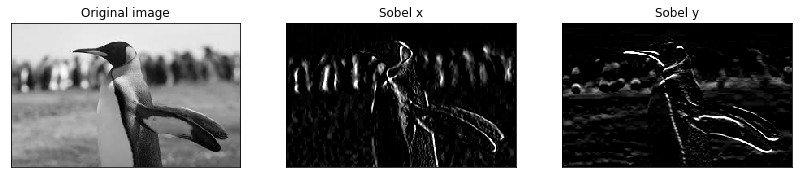

In [2]:
fig = plt.figure(figsize=(14, 3))
ax = fig.add_subplot(1, 3, 1, xticks=[], yticks=[])
ax.imshow(image, cmap='gray')
ax.set_title('Original image')

sobel_x = np.array([[ -1, 0, 1], 
                    [ -2, 0, 2], 
                    [ -1, 0, 1]])

sobel_y = np.array([[ -1, -2, -1], 
                    [ 0, 0, 0], 
                    [ 1, 2, 1]])

kernels = {'Sobel x': sobel_x, 'Sobel y': sobel_y}

for i, (title, kernel) in enumerate(kernels.items()):
    filtered_img = cv2.filter2D(image, -1, kernel)
    ax = fig.add_subplot(1, 3, i+2, xticks=[], yticks=[])
    ax.imshow(filtered_img, cmap='gray')
    ax.set_title(title)

### Typical CNN architecture

---

Kernels weights are _learnt_ during the training to _extract relevant features_ from input images.

<img id='cnn' src='images/cnn.png' width='800'>

<div class='source'>
    <a target='_blank' href='https://en.wikipedia.org/wiki/Convolutional_neural_network'>Source</a>
</div>

## CNN Visualisation with FlashTorch - 1

### Visualising saliency maps

---

### Saliency maps

---

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torchvision.models as models

### Install FlashTorch & load an image

---

First things first...

```
$ pip install flashtorch
```

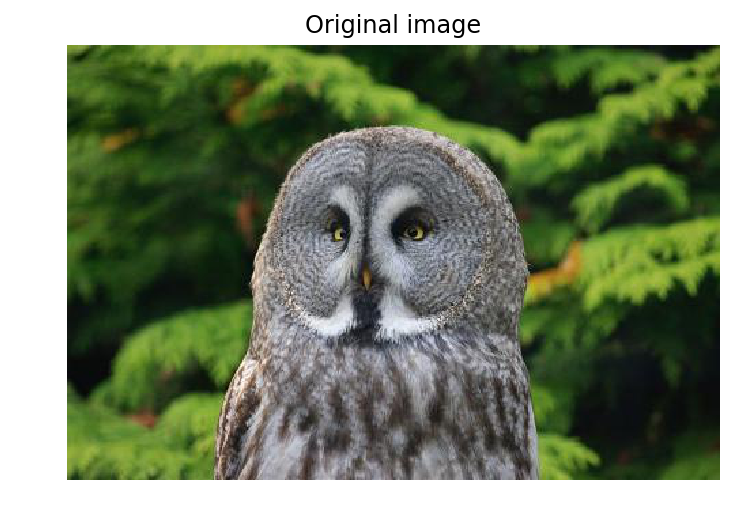

In [4]:
from flashtorch.utils import load_image

image = load_image('../../examples/images/great_grey_owl_01.jpg')

plt.imshow(image)
plt.title('Original image')
plt.axis('off');

### Convert to a torch tensor

---

In [5]:
from flashtorch.utils import apply_transforms

input_ = apply_transforms(image)

print(f'Before: {type(image)}')
print(f'After: {type(input_)}, {input_.shape}')

Before: <class 'PIL.Image.Image'>
After: <class 'torch.Tensor'>, torch.Size([1, 3, 224, 224])


### Let's visualise the input

---

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


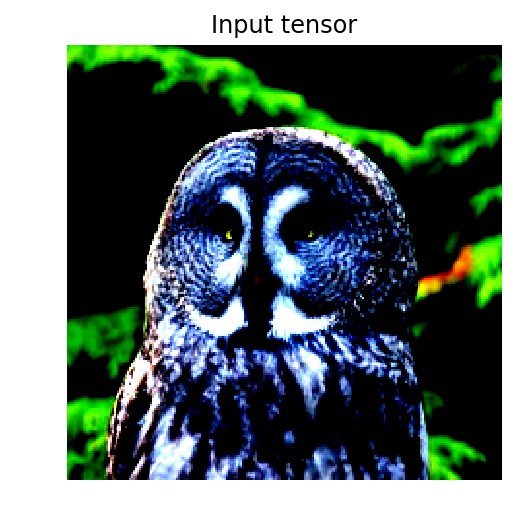

In [6]:
from flashtorch.utils import format_for_plotting

plt.imshow(format_for_plotting(input_))
plt.title('Input tensor')
plt.axis('off');

### Let's visualise the input - take two

---

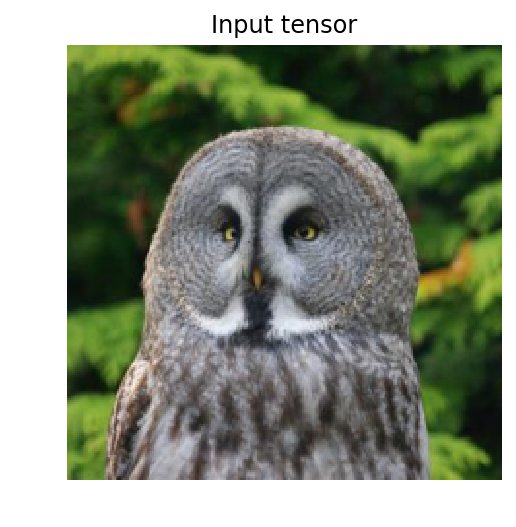

In [7]:
from flashtorch.utils import denormalize

plt.imshow(format_for_plotting(denormalize(input_)))
plt.title('Input tensor')
plt.axis('off');

### Load a pre-trained model & create a Backprop object

---

In [8]:
from flashtorch.saliency import Backprop

model = models.alexnet(pretrained=True)

backprop = Backprop(model)

```
Signature:

    backprop.calculate_gradients(input_, target_class=None, take_max=False)
```

### Retrieve the class index

---

In [9]:
from flashtorch.utils import ImageNetIndex 

imagenet = ImageNetIndex()
target_class = imagenet['great grey owl']

print(target_class)

24


### Finally, calculate the gradients w.r.t the input

---

In [10]:
gradients = backprop.calculate_gradients(input_, target_class)

max_gradients = backprop.calculate_gradients(input_, target_class, take_max=True)

print(type(gradients), gradients.shape)
print(type(max_gradients), max_gradients.shape)

<class 'torch.Tensor'> torch.Size([3, 224, 224])
<class 'torch.Tensor'> torch.Size([1, 224, 224])


### Let's inspect gradients

---

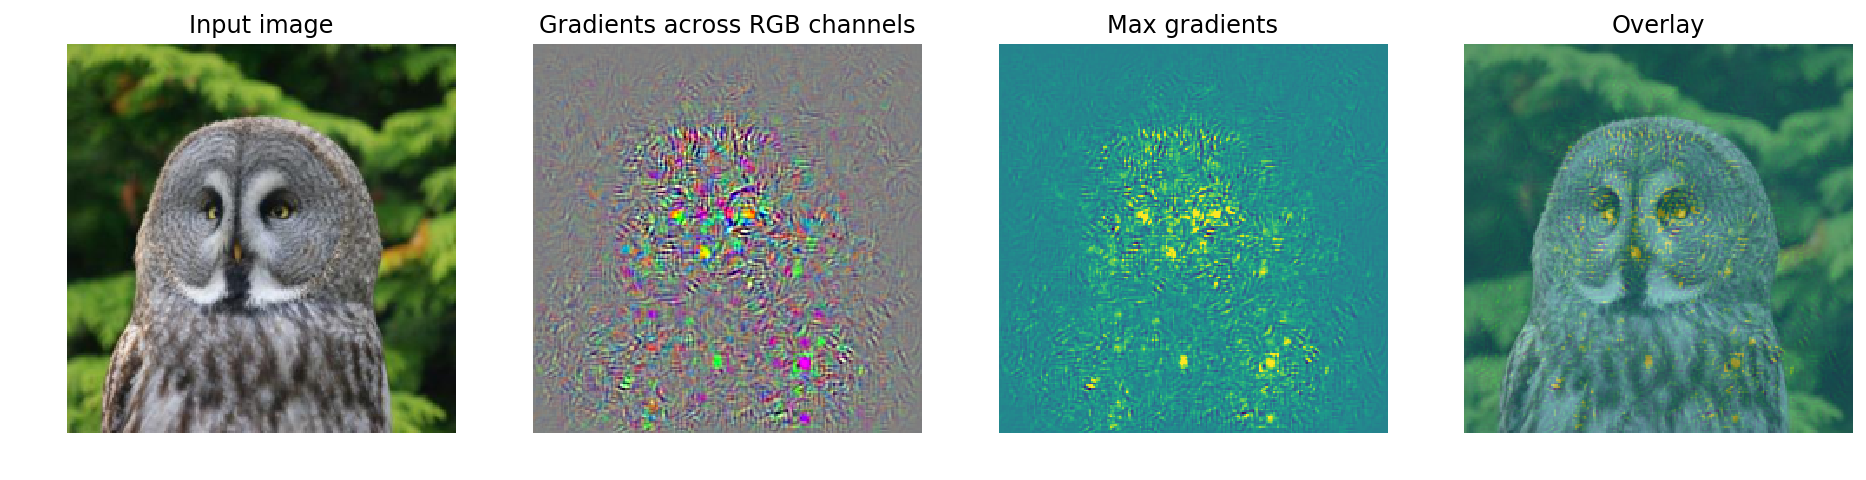

In [11]:
from flashtorch.utils import visualize

visualize(input_, gradients, max_gradients)

Pixels **where the animal is present** have the strongest positive effects.

But it's quite noisy...

### Guided backprop to the rescue!

---

TODO: add explanation of guided backprop

<img id='cnn' src='images/guided_backprop.png' width='800'>

<div class='source'>
    <a target='_blank' href='https://arxiv.org/pdf/1412.6806.pdf'>Source</a>
</div>

### Calculate the gradients with guided backprop

---

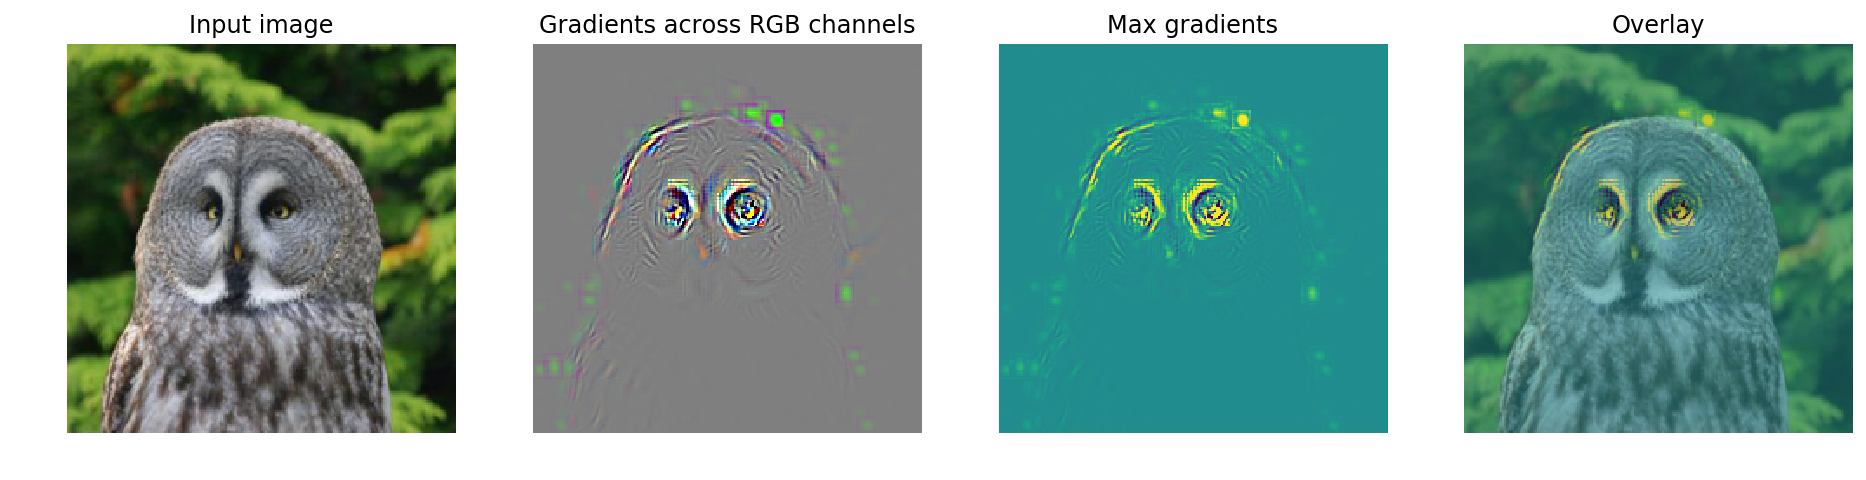

In [12]:
guided_gradients = backprop.calculate_gradients(input_, target_class, guided=True)

max_guided_gradients = backprop.calculate_gradients(input_, target_class, take_max=True, guided=True)

visualize(input_, guided_gradients, max_guided_gradients)

Now that's much less noisy!

Pixels around the **head and eyes** have the strongest positive effects.

### What about a jay?

---

In [13]:
input_ = apply_transforms(load_image('../../examples/images/jay_01.jpg'))
target_class = imagenet['jay']

guided_gradients = backprop.calculate_gradients(input_, target_class, guided=True)
max_guided_gradients = backprop.calculate_gradients(input_, target_class, take_max=True, guided=True)

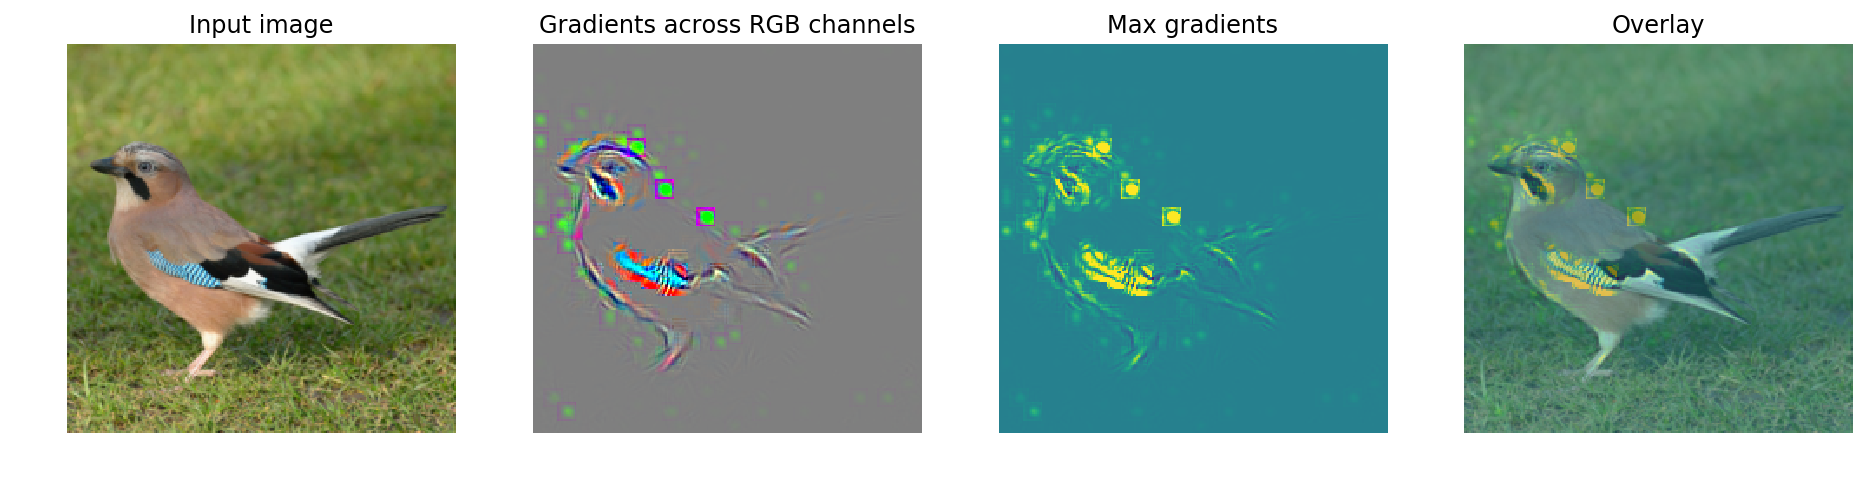

In [14]:
visualize(input_, guided_gradients, max_guided_gradients)

### Or an oystercatcher?

---

In [15]:
input_ = apply_transforms(load_image('../../examples/images/oystercatcher_01.jpg'))
target_class = imagenet['oytercathcer']

guided_gradients = backprop.calculate_gradients(input_, target_class, guided=True)
max_guided_gradients = backprop.calculate_gradients(input_, target_class, take_max=True, guided=True)

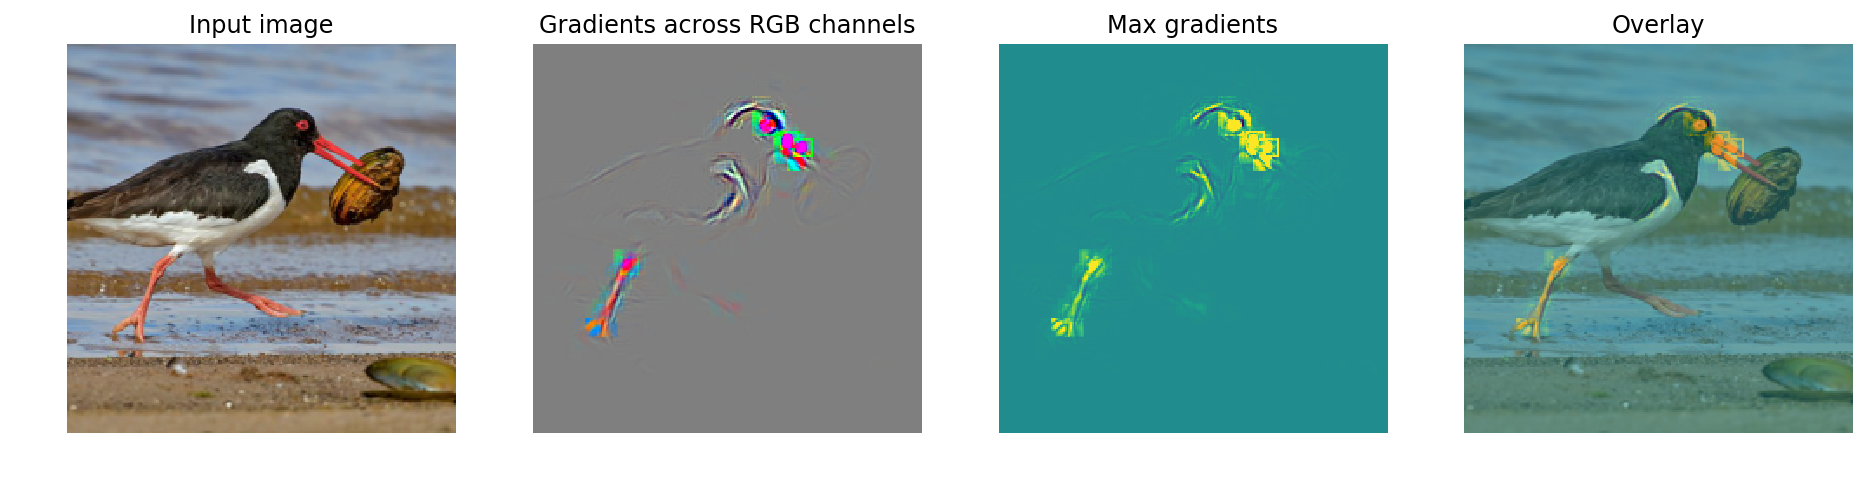

In [16]:
visualize(input_, guided_gradients, max_guided_gradients)

## CNN Visualisation with FlashTorch - 2

### Gaining additional insights on transfer learning

---

### Transfer Learning

---

- A model developed for a task is _reused as a starting point_ for another task

- Pre-trained models often used in computer visions & natural language processing tasks

- Save compute & time resources

### Flower Classifier

---

From: [Densenet](https://arxiv.org/abs/1608.06993) model, pre-trained on [ImageNet](http://www.image-net.org/) (1000 classes)

To: Flower classifier to recognise 102 species of flowers, using a [dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) from VGG group.

### Load a target image

---

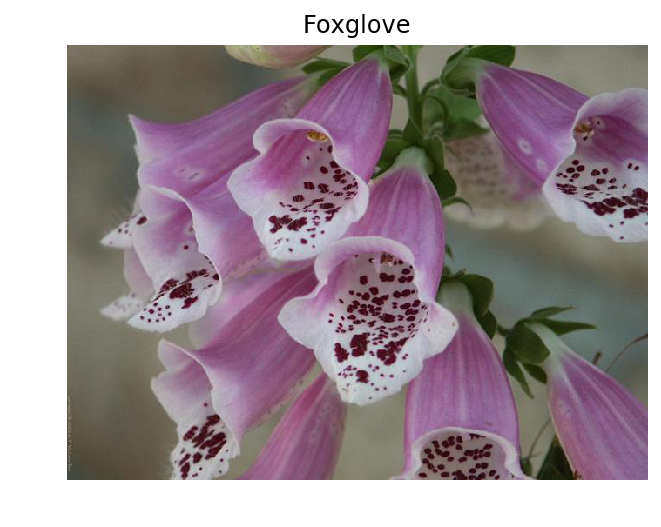

In [17]:
image = load_image('../../examples/images/foxglove.jpg')

plt.imshow(image)
plt.title('Foxglove')
plt.axis('off');

In [18]:
def create_model(filepath=None):
    in_feats = 2208
    out_feats = 102  # Total num of classes

    if filepath is not None:
        model = models.densenet161()
    else:
        model = models.densenet161(pretrained=True)
        
    model.classifier = nn.Sequential(nn.Linear(in_feats, out_feats),
                           nn.LogSoftmax(dim=1))

    if filepath is not None:
        checkpoint = torch.load(filepath, map_location='cpu')
        model.load_state_dict(checkpoint['state_dict'])
        
    for param in model.parameters():
        param.requires_grad = False
    
    return model

### Pre-trained model (no additional training!)

---

In [19]:
input_ = apply_transforms(image)

class_index = 96  # foxglove

pretrained_model = create_model()

backprop = Backprop(pretrained_model)

/Users/misao/Projects/personal/flashtorch/flashtorch/saliency/backprop.py:93: UserWarning: The predicted class does not equal the
                target class. Calculating the gradient with respect to the
                predicted class.
  predicted class.'''))


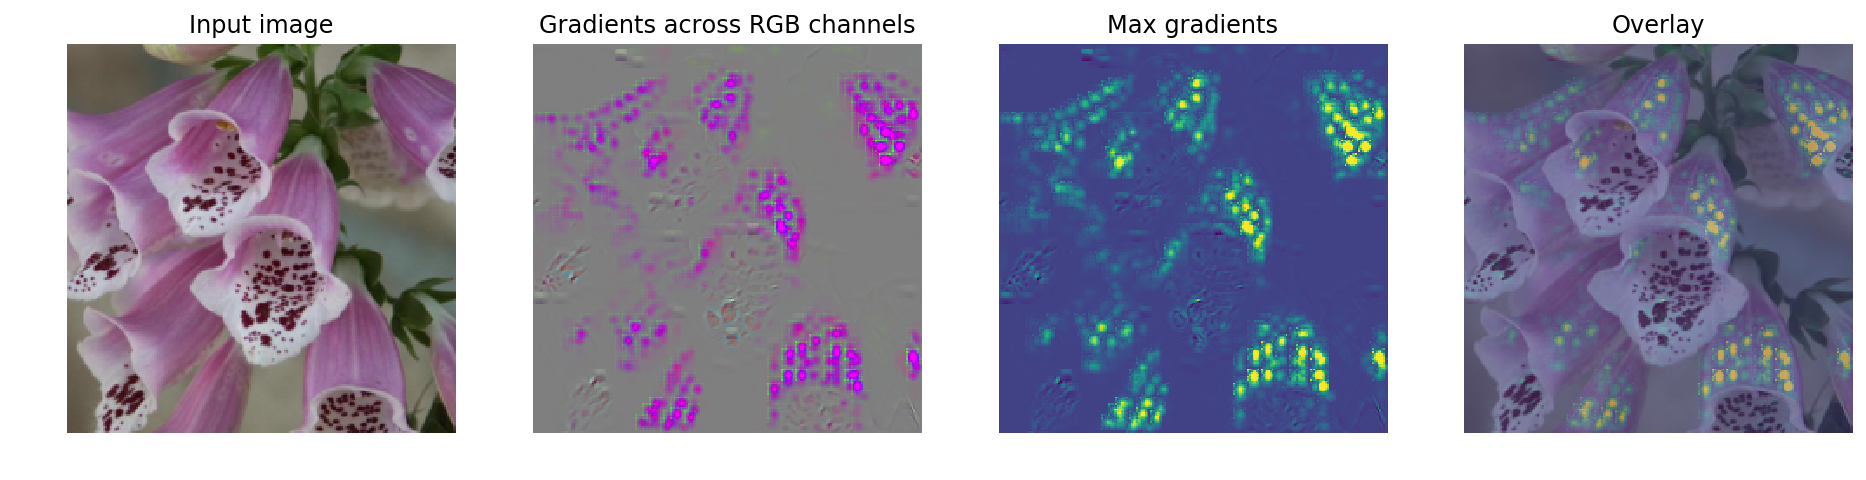

In [20]:
guided_gradients = backprop.calculate_gradients(input_, class_index, guided=True)

guided_max_gradients = backprop.calculate_gradients(input_, class_index, take_max=True, guided=True)

visualize(input_, guided_gradients, guided_max_gradients)

### Trained model

---

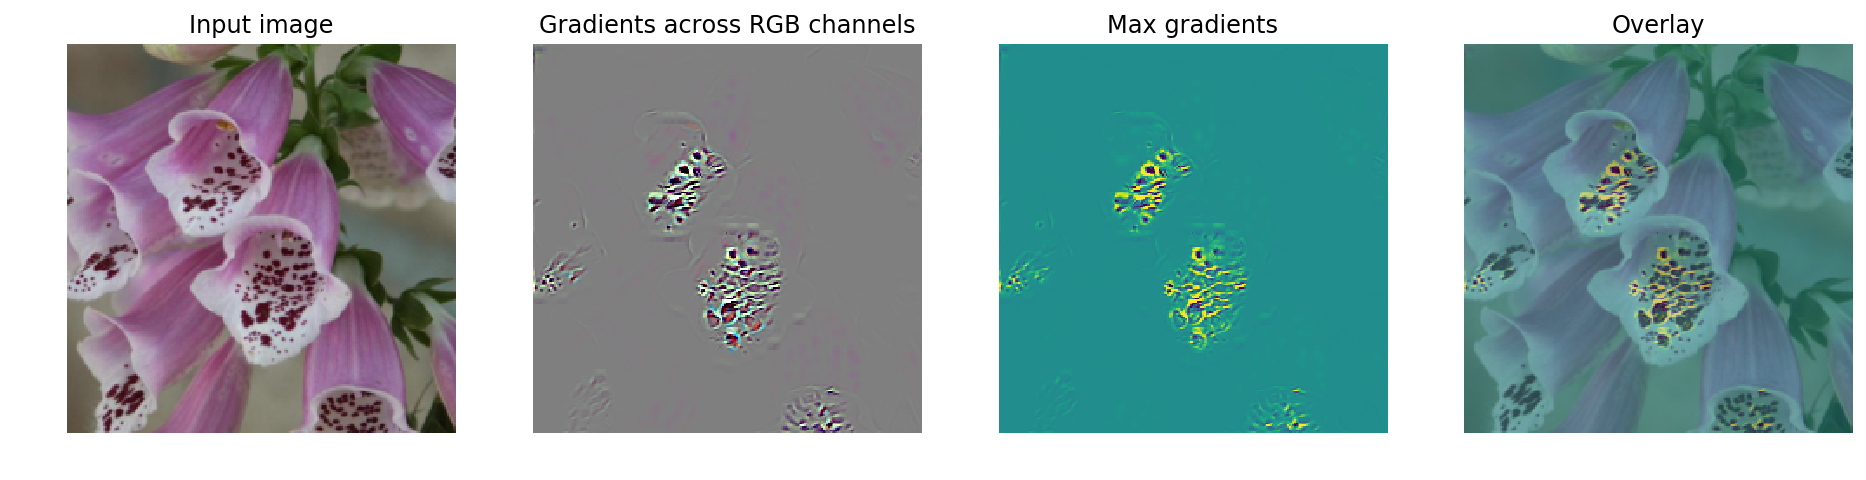

In [21]:
trained_model = create_model('../../models/flower_classification_transfer_learning.pt')

backprop = Backprop(trained_model)

guided_gradients = backprop.calculate_gradients(input_, class_index, guided=True)

guided_max_gradients = backprop.calculate_gradients(input_, class_index, take_max=True, guided=True)

visualize(input_, guided_gradients, guided_max_gradients)